In [2]:
%cd ../..

/home/tornikeo/Documents/personal/thesis/qcxms/subprojects/tblite


/home/tornikeo/micromamba/envs/pb/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
# !OMP_NUM_THREADS=1 meson test -C build/ hamiltonian --verbose > data.txt
!meson test -C build/ hamiltonian --verbose > data.txt

In [3]:
import re
import pandas as pd

# Define the file path
file_path = "data.txt"

# Read the file content
with open(file_path, "r") as file:
    content = file.read()

# Define a regex pattern to extract the test case and its details
pattern = r"Starting hamiltonian-(?P<testcase>[\w\-]+) \.\.\. \(\d+/\d+\)\n" \
          r" nat\s+(?P<nat>\d+)\n" \
          r" nprim\s+(?P<nprim>\d+)\n" \
          r" maxl\s+(?P<maxl>\d+)\n" \
          r" max_nnl\s+(?P<max_nnl>\d+)\n" \
          r" mean_nnl\s+(?P<mean_nnl>\d+)\n" \
          r" max_nsh\s+(?P<max_nsh>\d+)\n" \
          r"cpu_time\s+(?P<cpu_time>[\d\.]+)\n" \
          r"gpu_gb_in\s+(?P<gpu_gb_in>[\d\.]+)\n" \
          r"gpu_gb_out\s+(?P<gpu_gb_out>[\d\.]+)\n" \
          r"gpu_gb_total\s+(?P<gpu_gb_total>[\d\.]+)\n" \
          r"gpu_between_atoms\s+(?P<gpu_between_atoms>[\d\.]+) ms\n" \
          r"gpu_in_atoms\s+(?P<gpu_in_atoms>[\d\.]+)\n" \
          r"gpu_time\s+(?P<gpu_time>[\d\.]+)\n" \
          r"\s+gpu_walltime\s+(?P<gpu_walltime>[\d\.]+)"

# Use re.finditer to extract all matches
matches = re.finditer(pattern, content)

# Create a list of dictionaries to store the extracted data
data = []
for match in matches:
    data.append(match.groupdict())

# Convert the list of dictionaries into a pandas DataFrame
df = pd.DataFrame(data)

# Convert numeric columns to appropriate data types
numeric_columns = ["nat", "nprim", "maxl", "max_nnl", "mean_nnl", "max_nsh",
                   "cpu_time", "gpu_between_atoms", "gpu_in_atoms", "gpu_time", "gpu_walltime"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Display the DataFrame
df = df.sort_values('nat')
df

,testcase,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_walltime
0,Glutamine,29,6,1,28,14,2,5.528855,0.000453,0.000444,0.000896,10.753024,1.419264,12.172288,1517.658743
1,ICEX,84,6,1,959,484,2,82.358610,0.002818,0.002484,0.005302,162.080734,1.909760,163.990494,167.433226
2,DNA-strand,387,6,2,164,69,3,498.262606,0.232068,0.231803,0.463871,264.220673,8.302592,272.523254,388.358275
4,101d-netropsin-and-dna,556,6,2,484,203,3,848.911236,0.479133,0.478153,0.957286,777.675049,10.221536,787.896606,1000.316980
3,lysozyme,1102,6,2,310,99,3,1195.772914,1.749900,1.748891,3.498791,976.695190,16.091137,992.786316,1757.713438
5,103l-t4-lysozyme,1404,6,2,312,99,3,1621.343695,2.816439,2.815150,5.631588,1206.841309,19.338465,1226.179810,2476.257863


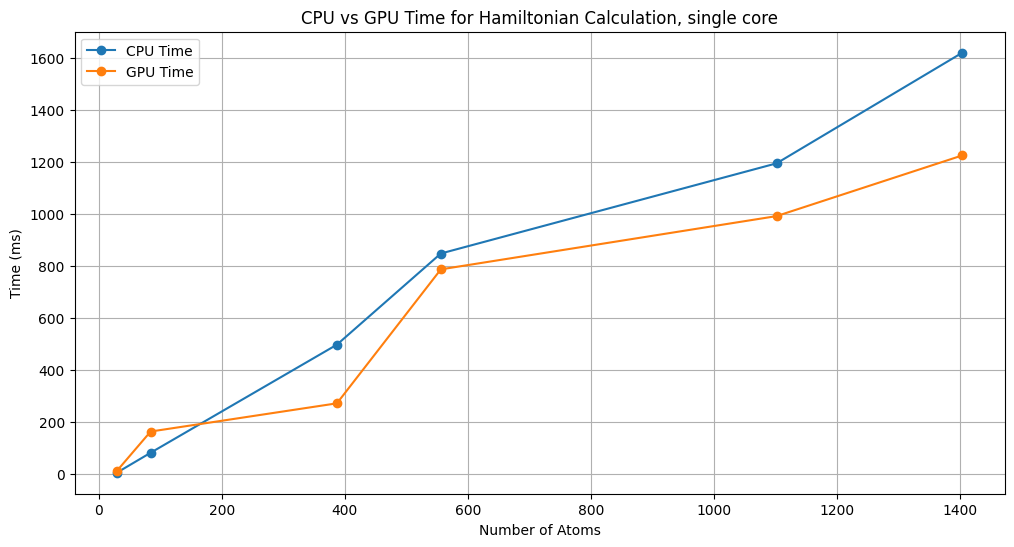

In [4]:
import matplotlib.pyplot as plt

# Line plot for time vs number of atoms, and compare CPU and GPU times
plt.figure(figsize=(12, 6))
plt.plot(df['nat'], df['cpu_time'], label='CPU Time', marker='o')
plt.plot(df['nat'], df['gpu_time'], label='GPU Time', marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Time (ms)')
plt.title('CPU vs GPU Time for Hamiltonian Calculation, single core')
plt.legend()
plt.grid()
# plt.savefig('cpu_vs_gpu_time.png')
# plt.show()

In [7]:
# Enable all CPU cores
!meson test -C build/ hamiltonian --verbose > /tmp/data-allcores.txt

In [8]:
# Read the file content
with open('/tmp/data-allcores.txt', "r") as file:
    content = file.read()

matches = re.finditer(pattern, content)

# Create a list of dictionaries to store the extracted data
data = []
for match in matches:
    data.append(match.groupdict())

# Convert the list of dictionaries into a pandas DataFrame
df = pd.DataFrame(data)

# Convert numeric columns to appropriate data types
numeric_columns = ["nat", "nprim", "maxl", "max_nnl", "mean_nnl", "max_nsh",
                   "cpu_time", "gpu_between_atoms", "gpu_in_atoms", "gpu_time", "gpu_walltime"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Display the DataFrame
df = df.sort_values('nat')
df

,testcase,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_walltime
0,Glutamine,29,6,1,28,14,2,9.061523,0.000453,0.000444,0.000896,15.793088,1.458016,17.251104,1594.753199
1,ICEX,84,6,1,959,484,2,14.640462,0.002818,0.002484,0.005302,161.866745,1.771392,163.638138,168.065384
2,DNA-strand,387,6,2,164,69,3,68.603207,0.232068,0.231803,0.463871,264.695007,8.347648,273.042664,390.393427
4,101d-netropsin-and-dna,556,6,2,484,203,3,123.500162,0.479133,0.478153,0.957286,804.601868,10.188800,814.790649,1028.923209
3,lysozyme,1102,6,2,310,99,3,233.179595,1.749900,1.748891,3.498791,958.566467,15.898272,974.464722,1768.633143
5,103l-t4-lysozyme,1404,6,2,312,99,3,344.975488,2.816439,2.815150,5.631588,1208.480103,19.497663,1227.977783,2493.940099


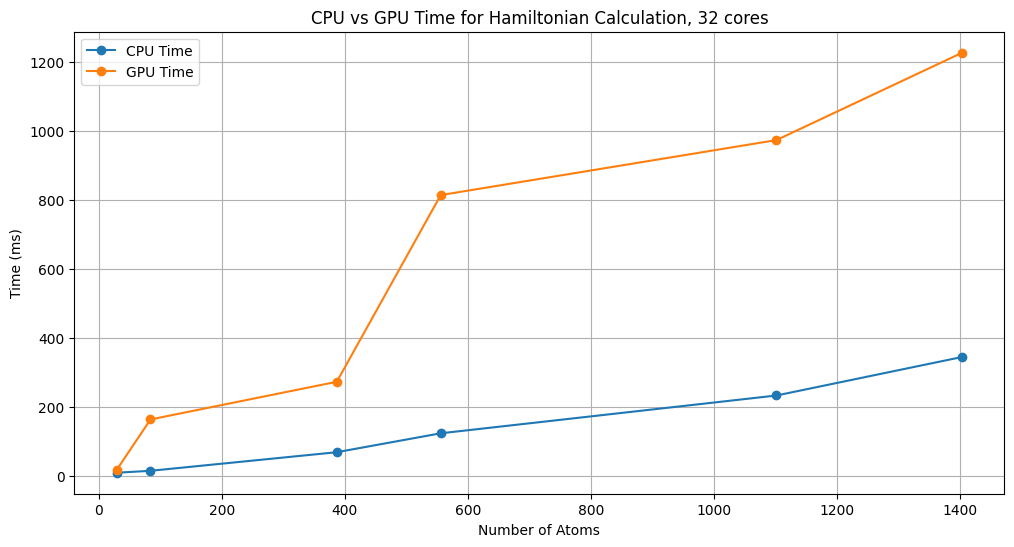

In [9]:
import matplotlib.pyplot as plt

# Line plot for time vs number of atoms, and compare CPU and GPU times
plt.figure(figsize=(12, 6))
plt.plot(df['nat'], df['cpu_time'], label='CPU Time', marker='o')
plt.plot(df['nat'], df['gpu_time'], label='GPU Time', marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Time (ms)')
plt.title('CPU vs GPU Time for Hamiltonian Calculation, 32 cores')
plt.legend()
plt.grid()